In [1]:
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 15, 15


In [2]:
import pandas as pd
import numpy as np

In [3]:
corpus_path = "../../Corpus/serialised/question_time_1998_to_2014_without_notice_only.csv"
corpus = pd.read_csv(corpus_path, index_col=0)
corpus.dropna(inplace=True)
corpus.reset_index(inplace=True)
corpus["year"]=corpus["index"].str[:4]
corpus

,index,party_Q,party_A,question,answer,year
0,2011-02-09-1,LP,ALP,I remind the Prime Minister that after Cyclone...,I thank the Leader of the Opposition for his q...,2011
1,2011-02-09-2,ALP,ALP,Will the Prime Minister outline the government...,I thank the member for Capricornia for her que...,2011
2,2011-02-09-3,LP,ALP,While the government is offering concessional ...,I thank the member for his question and indica...,2011
3,2011-02-09-4,ALP,ALP,What action is the government taking to rebuil...,I thank the member for Oxley for his question....,2011
4,2011-02-09-5,LP,ALP,How many Australians will have to pay the floo...,I thank the Shadow Treasurer for this very imp...,2011
5,2011-02-09-6,NATS,ALP,Will the government review its decision to cut...,I thank the member for O'Connor for his questi...,2011
6,2011-02-09-7,ALP,ALP,Will the Treasurer outline to the House the ec...,I thank the member for Moreton for his questio...,2011
7,2011-02-09-8,LP,ALP,"A small business in my electorate, Apex Smash ...",I thank the member for her question. Of course...,2011
8,2011-02-09-9,ALP,ALP,Will the Treasurer outline to the House the fi...,I thank the member for Bendigo for his questio...,2011
9,2011-02-09-10,NATS,ALP,I refer the Treasurer to his recent statement ...,"I thank the member for his question, because i...",2011


In [4]:
import nltk
import gensim

In [ ]:
tokenised_docs = list(map(nltk.word_tokenize,corpus.question))
ind2word = gensim.corpora.Dictionary.from_documents(tokenised_docs)
doc_bows = [ind2word.doc2bow(doc) for doc in tokenised_docs]
lda = gensim.models.ldamodel.LdaModel(corpus=doc_bows, id2word=ind2word, num_topics=100)
print(lda[doc_bows[1]])

In [5]:
import gensim.models.doc2vec as doc2vec
docs = map(lambda case: doc2vec.TaggedDocument(*case),
                zip(map(nltk.word_tokenize,corpus.question), [corpus.index]))

model = doc2vec.Doc2Vec(#docs,
        size=50, 
        alpha=0.025,
        window=8, 
        min_count=5,
        sample=0,
        workers=1,
        min_alpha=0.0001,
        dm=1,
        hs=1,
        negative=5,
        dm_mean=0)
model.build_vocab(docs)

In [7]:
from random import shuffle

alpha, min_alpha, passes = (0.025, 0.00001, 2000)
alpha_delta = (alpha - min_alpha) / passes



for epoch in range(passes):
    duration = 'na'
    model.alpha, model.min_alpha = alpha, alpha
    
    model.train(docs)
        
    print('completed pass %i at alpha %f' % (epoch + 1, alpha))
    alpha -= alpha_delta
    #shuffle(docs)  # shuffling at end so that it is not sufflled on first run, so indexes match  



completed pass 1 at alpha 0.025000
completed pass 2 at alpha 0.024988
completed pass 3 at alpha 0.024975
completed pass 4 at alpha 0.024963
completed pass 5 at alpha 0.024950
completed pass 6 at alpha 0.024938
completed pass 7 at alpha 0.024925
completed pass 8 at alpha 0.024913
completed pass 9 at alpha 0.024900
completed pass 10 at alpha 0.024888
completed pass 11 at alpha 0.024875
completed pass 12 at alpha 0.024863
completed pass 13 at alpha 0.024850
completed pass 14 at alpha 0.024838
completed pass 15 at alpha 0.024825
completed pass 16 at alpha 0.024813
completed pass 17 at alpha 0.024800
completed pass 18 at alpha 0.024788
completed pass 19 at alpha 0.024775
completed pass 20 at alpha 0.024763
completed pass 21 at alpha 0.024750
completed pass 22 at alpha 0.024738
completed pass 23 at alpha 0.024725
completed pass 24 at alpha 0.024713
completed pass 25 at alpha 0.024700
completed pass 26 at alpha 0.024688
completed pass 27 at alpha 0.024675
completed pass 28 at alpha 0.024663
c

In [8]:
corpus["q_embeddings"]= list(model.docvecs)
corpus


,index,party_Q,party_A,question,answer,year,q_embeddings
0,2011-02-09-1,LP,ALP,I remind the Prime Minister that after Cyclone...,I thank the Leader of the Opposition for his q...,2011,"[-0.00243128, -0.00343329, -0.00951588, 0.0097..."
1,2011-02-09-2,ALP,ALP,Will the Prime Minister outline the government...,I thank the member for Capricornia for her que...,2011,"[-0.00160075, 0.00308926, -0.00888655, -0.0093..."
2,2011-02-09-3,LP,ALP,While the government is offering concessional ...,I thank the member for his question and indica...,2011,"[0.00338758, -0.00243414, -0.00525016, 0.00866..."
3,2011-02-09-4,ALP,ALP,What action is the government taking to rebuil...,I thank the member for Oxley for his question....,2011,"[0.00332026, -0.00823436, 0.00946901, -0.00317..."
4,2011-02-09-5,LP,ALP,How many Australians will have to pay the floo...,I thank the Shadow Treasurer for this very imp...,2011,"[-0.00761677, 0.00862817, -0.00816909, 0.00628..."
5,2011-02-09-6,NATS,ALP,Will the government review its decision to cut...,I thank the member for O'Connor for his questi...,2011,"[0.00437041, -0.00399282, 0.000916501, 0.00797..."
6,2011-02-09-7,ALP,ALP,Will the Treasurer outline to the House the ec...,I thank the member for Moreton for his questio...,2011,"[0.00905037, 0.00230722, 0.00210327, -0.000528..."
7,2011-02-09-8,LP,ALP,"A small business in my electorate, Apex Smash ...",I thank the member for her question. Of course...,2011,"[0.00227349, -0.00118123, 0.00838161, -0.00736..."
8,2011-02-09-9,ALP,ALP,Will the Treasurer outline to the House the fi...,I thank the member for Bendigo for his questio...,2011,"[-0.000629065, 0.00151811, 0.00118222, -0.0086..."
9,2011-02-09-10,NATS,ALP,I refer the Treasurer to his recent statement ...,"I thank the member for his question, because i...",2011,"[-0.00307546, 0.00778113, 0.00248712, 0.003067..."


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,
     perplexity=30.0,
     early_exaggeration=4.0,
     learning_rate=1000.0,
     n_iter=1000,
     metric='euclidean',
     init='random',
     verbose=10,
     random_state=None)
Y = tsne.fit_transform(np.row_stack(corpus.q_embeddings))

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 18240
[t-SNE] Computed conditional probabilities for sample 2000 / 18240
[t-SNE] Computed conditional probabilities for sample 3000 / 18240
[t-SNE] Computed conditional probabilities for sample 4000 / 18240
[t-SNE] Computed conditional probabilities for sample 5000 / 18240
[t-SNE] Computed conditional probabilities for sample 6000 / 18240
[t-SNE] Computed conditional probabilities for sample 7000 / 18240
[t-SNE] Computed conditional probabilities for sample 8000 / 18240
[t-SNE] Computed conditional probabilities for sample 9000 / 18240
[t-SNE] Computed conditional probabilities for sample 10000 / 18240
[t-SNE] Computed conditional probabilities for sample 11000 / 18240
[t-SNE] Computed conditional probabilities for sample 12000 / 18240
[t-SNE] Computed conditional probabilities for sample 13000 / 18240
[t-SNE] Computed conditional probabilities for sample 14000 / 18240
[t-SNE] Computed 

In [207]:
from sklearn.decomposition import PCA
pca = PCA(2)
Y = pca.fit_transform(np.row_stack(corpus.q_embeddings))

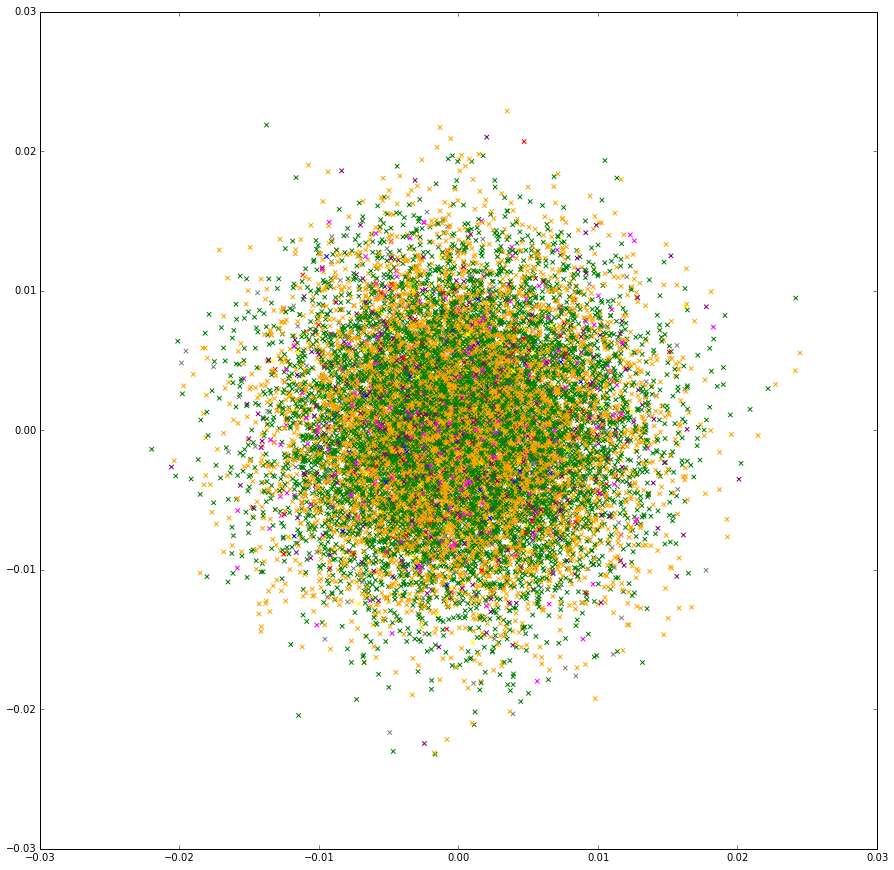

In [212]:
color_names = "red green blue yellow magenta orange purple grey pink lime gold violet black indigo salmon silver black".split()
lbls = corpus.party_Q
color_dict = dict(zip(np.unique(lbls), color_names))
colors = [color_dict[lbl] for lbl in lbls]

pl.scatter(x=Y[:,0],y=Y[:,1], c=colors, marker="x")

In [131]:
color_dict

{'1998': 'red',
 '1999': 'green',
 '2000': 'blue',
 '2001': 'yellow',
 '2002': 'magenta',
 '2003': 'orange',
 '2004': 'purple',
 '2005': 'grey',
 '2006': 'pink',
 '2007': 'lime',
 '2008': 'gold',
 '2009': 'violet',
 '2010': 'black',
 '2011': 'indigo',
 '2012': 'salmon',
 '2013': 'silver'}

In [97]:
train_index = np.random.rand(len(corpus))>0.1
training_data = corpus[train_index]
test_data = corpus[np.logical_not(train_index)]

In [110]:
from sklearn.svm import NuSVC, SVC

svm = SVC()
svm.fit(np.row_stack(training_data.q_embeddings), training_data.party_Q)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [111]:
svm.score(np.row_stack(test_data.q_embeddings), test_data.party_Q)

0.47347850362925742